In [6]:
import sys, math
from skimage import data, io, filters, color, img_as_ubyte, transform
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from collections import defaultdict

Part 1:

In [7]:
def plotHistogram(im) :
    if len(im.shape) != 2:
        im = im[:,:,0]
    mapp = [0] * 256
    for row in range(im.shape[0]):
        for col in range(im.shape[1]):
            key = im[row][col]
            mapp[key] += 1
    pixel_count = sum(mapp)
    mapp = [(val * 1.0)/pixel_count for val in mapp]
    plt.figure()
    plt.bar(range(256), mapp)
    plt.show()

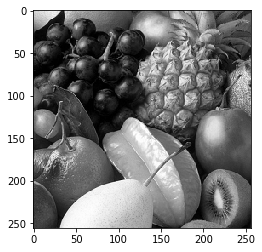

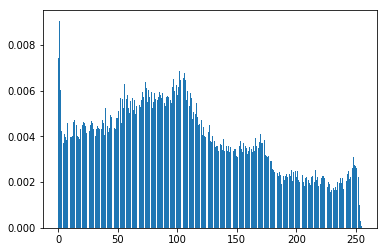

In [8]:
im = imread('./A1_resources/Q4/fruit.bmp')
plt.figure()
plt.imshow(im, cmap = "gray")
plotHistogram(im)

Part 2:


In [9]:
lena = imread('./A1_resources/Q4/lena.bmp')
lena_list = []
lena_list.append(img_as_ubyte(transform.rescale(lena, 0.5)))
for i in range(4):
    lena_list.append(img_as_ubyte(transform.rescale(lena_list[i], 0.5)))

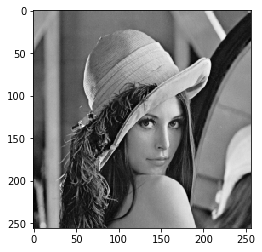

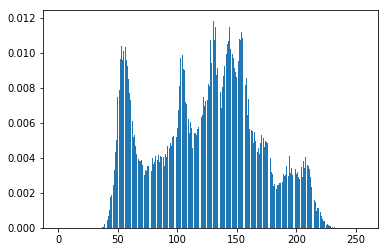

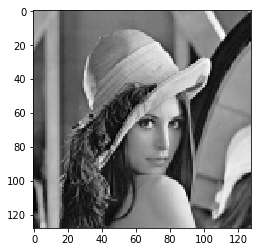

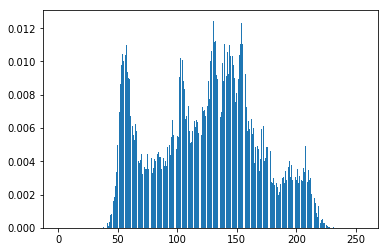

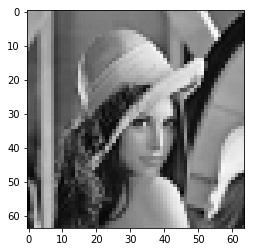

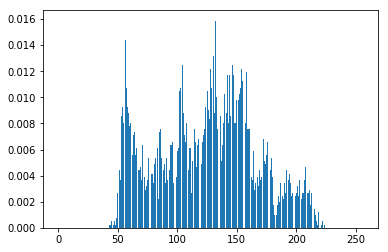

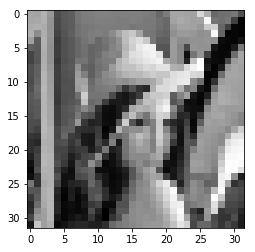

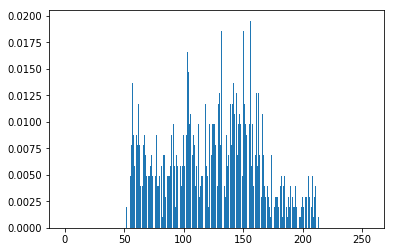

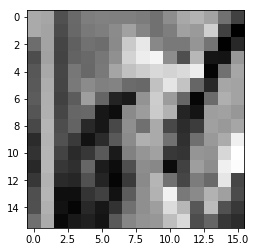

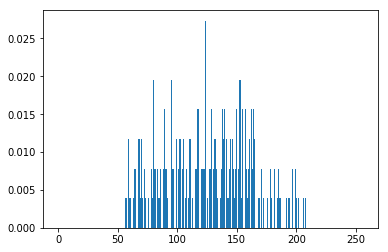

In [5]:
for lena in lena_list:
    plt.figure()
    plt.imshow(lena, cmap = "gray")
    plotHistogram(lena)


Histogram representation storage:

| Resolution             | 16x16 | 32x32 | 64x64 | 128x128 | 256x256 |  
| ---------------------- |:-----:|:-----:|:-----:|:-------:|--------:|  
| Histogram size (bytes) | 1024  | 1024  | 1024  | 1024    | 1024    |  
| Raw size (bytes)       | 256   | 1024  | 4096  | 16348   | 65536   |  

Understanding and Observations:  

By decreasing the size of the image, we are sampling the image. This means that the frequencies of multiple intensities will go down, which is evident from the graphs. The distribution seems more continuous at a higher number of samples, which matches our intuition of sampling, that an infinitesimally small resolution would result in a continuous image.

There is a huge loss in image quality from 32x32 to 16x16, but not so much loss in image quality from 256x256 to 128x128.

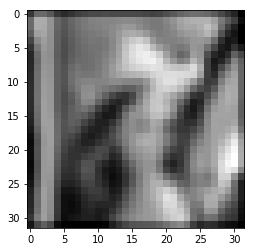

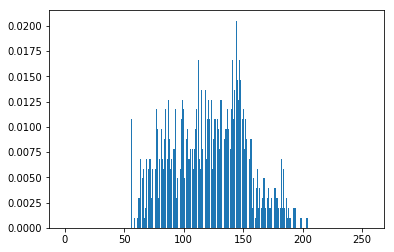

<Figure size 432x288 with 0 Axes>

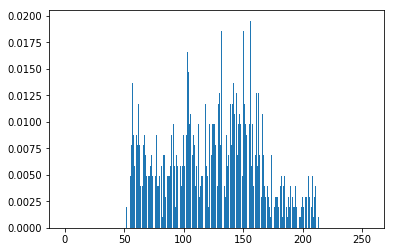

In [12]:
lena_upsampled = img_as_ubyte(transform.rescale(lena_list[4], 2.0))

plt.figure()
plt.imshow(lena_upsampled, cmap = "gray")
plotHistogram(lena_upsampled)

plt.figure()
#plt.imshow(lena_list[3], cmap = "gray")
plotHistogram(lena_list[3])